In [37]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


/srv/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [38]:
data = pd.read_csv('Cars93.csv')
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM','Rev.per.mile','Fuel.tank.capacity','Passengers', 'Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']])
Y = data['Price'].values.reshape(-1,1)
loo=LeaveOneOut()

In [42]:
lamb=np.logspace(-1,0,100)

In [57]:
def mse(y_a, y_b):
    d = (y_a - y_b)**2
    return d.mean()

array=np.zeros((100,13))
cv=np.zeros(len(lamb))
for i in range(len(lamb)):
    mse1=[]
    
    for train_index, test_index in loo.split(X):
            X_train= X[train_index,:]
            X_test = X[test_index,:]
            Y_train =Y[train_index]
            Y_test = Y[test_index]
            clf = linear_model.Lasso(alpha=lamb[i],normalize=True)
            clf.fit(X_train,Y_train)
            coeff=clf.coef_
            for j in range(len(coeff)):
                array[i,j]=coeff[j]
            intercept=clf.intercept_
            Y_model=clf.predict(X_test)
            mse1.append(mse(Y_model,Y_test))
            
            
    cv[i]= np.mean(mse1)      
cv1=np.array(cv)   


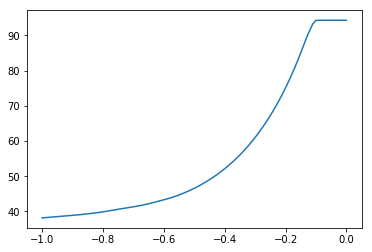

In [58]:
plt.plot(np.log10(lamb),cv1)

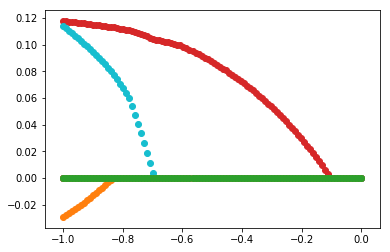

In [68]:
for j in range(13):
        plt.scatter(np.log10(lamb),array[:,j])